<a href="https://colab.research.google.com/github/LinggarM/Comparison-of-Ensemble-Learning-Methods-on-Diabetes-Disease-Classification/blob/main/pengenalan_pola_Perbandingan_Metode_Ensemble_Learning_pada_Klasifikasi_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

In [1]:
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
import pandas as pd

df_pima_indians_diabetes = pd.read_csv('/content/gdrive/MyDrive/Upload/Akademik/Pengenalan Pola/1. pima_indians_diabetes.csv')
df_frankfurt_diabetes = pd.read_csv('/content/gdrive/MyDrive/Upload/Akademik/Pengenalan Pola/2. frankfurt_diabetes.csv')
df_bit_mesra_diabetes = pd.read_csv('/content/gdrive/MyDrive/Upload/Akademik/Pengenalan Pola/3. bit_mesra_diabetes.csv')
df_sylhet_diabetes = pd.read_csv('/content/gdrive/MyDrive/Upload/Akademik/Pengenalan Pola/4. sylhet_diabetes.csv')

# Preprocessing dengan MinMax Scaler

## Dataset 1 : Pima Indians Diabetes

In [60]:
df_pima_indians_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [61]:
df_pima_indians_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [62]:
df_pima_indians_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [114]:
from numpy import nan
df_pima_indians_diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df_pima_indians_diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, nan)
df_pima_indians_diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [115]:
df_pima_indians_diabetes = df_pima_indians_diabetes.drop('SkinThickness', axis = 1)
df_pima_indians_diabetes = df_pima_indians_diabetes.drop('Insulin', axis = 1)
df_pima_indians_diabetes

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,33.6,0.627,50,1
1,1,85.0,66.0,26.6,0.351,31,0
2,8,183.0,64.0,23.3,0.672,32,1
3,1,89.0,66.0,28.1,0.167,21,0
4,0,137.0,40.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...
763,10,101.0,76.0,32.9,0.171,63,0
764,2,122.0,70.0,36.8,0.340,27,0
765,5,121.0,72.0,26.2,0.245,30,0
766,1,126.0,60.0,30.1,0.349,47,1


In [118]:
df_pima_indians_diabetes.isnull().sum()

Pregnancies                  0
Glucose                      5
BloodPressure               35
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [121]:
df_pima_indians_diabetes.shape

(768, 7)

In [122]:
df_pima_indians_diabetes.dropna(inplace = True)
df_pima_indians_diabetes.shape

(724, 7)

In [124]:
df_pima_indians_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,32.467127,0.474765,33.350829,0.343923
std,3.362803,30.750030,12.379870,6.888941,0.332315,11.765393,0.475344
min,0.000000,44.000000,24.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,32.400000,0.379000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,67.100000,2.420000,81.000000,1.000000


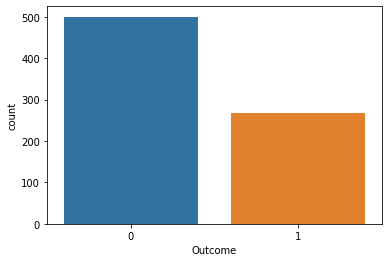

In [149]:
import seaborn as sns

sns.countplot(data = df_pima_indians_diabetes, x = 'Outcome')

In [166]:
import matplotlib.pyplot as plt

# for i in df_pima_indians_diabetes['Age'] :
#   result.append(i)
#   # for j in df_pima_indians_diabetes['Outcome'] :
#   #   if j = 1 :
#   #     result += 1
# result.sort
# result

y = df_pima_indians_diabetes.groupby(['Age'])
y_baru = pd.DataFrame(y)
y_baru
positive = []
for i in y_baru[1] :
  result = 0
  inte = 0
  for j in y_baru[1][inte]['Outcome'] :
    inte += 1
    if j == 0 :
      result += 1
  positive.append(result)
y_baru['Positive'] = positive

# df_pima_indians_diabetes.plot.bar(x = 'Age', y = 'Outcome')
# plt.show()

In [172]:
result = 0
for i in y_baru[1][0]['Outcome'] :
  if i == 1 :
      result += 1
result

5

In [63]:
# memisahkan atribut fitur (selain target/ kelas prediksi)
x = df_pima_indians_diabetes[df_pima_indians_diabetes.columns[:8]]
 
# memisahkan target/ kelas prediksi (0 dan 1)
y = df_pima_indians_diabetes['Outcome']

In [64]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [65]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(x)
x = pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


In [66]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [67]:
# memisahkan data untuk training dan testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [132]:
from sklearn.decomposition import PCA

PCA_fitter = PCA(n_components = 4)
PCA_features = PCA_fitter.fit_transform(x_train)
PCA_features

array([[ 0.37303824,  0.31609092,  0.04037213,  0.19967559],
       [-0.1474509 ,  0.0146214 , -0.13100538, -0.04950415],
       [-0.05190423,  0.4195631 , -0.30050438,  0.21689695],
       ...,
       [ 0.40952546, -0.0431744 , -0.14434789, -0.07188499],
       [-0.03958054,  0.50025874, -0.13210131,  0.01998468],
       [-0.01378124,  0.30006069, -0.28279506, -0.03477985]])

### Bagging

In [68]:
from time import time
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier

names = ['Random Forest Classifier',
         'Bagging Classifier']
classifiers = [RandomForestClassifier(),
               BaggingClassifier()]
zipped_clf = zip(names, classifiers)

In [69]:
clf = BaggingClassifier().fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('BAGGING RESULT =')
print('Accuracy : ', accuracy, '\nPrecision : ', precision, '\nRecall : ', recall, '\nF1-Score : ', f1)

BAGGING RESULT =
Accuracy :  0.8116883116883117 
Precision :  0.78125 
Recall :  0.7630741698150726 
F1-Score :  0.7708686060232929


In [70]:
clf = RandomForestClassifier().fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('RANDOM FOREST RESULT =')
print('Accuracy : ', accuracy, '\nPrecision : ', precision, '\nRecall : ', recall, '\nF1-Score : ', f1)

RANDOM FOREST RESULT =
Accuracy :  0.7987012987012987 
Precision :  0.7628824476650564 
Recall :  0.759693776098628 
F1-Score :  0.7612403100775195


In [71]:
clf = ExtraTreesClassifier().fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('EXTRA TREES RESULT =')
print('Accuracy : ', accuracy, '\nPrecision : ', precision, '\nRecall : ', recall, '\nF1-Score : ', f1)

EXTRA TREES RESULT =
Accuracy :  0.7922077922077922 
Precision :  0.7550208789023662 
Recall :  0.7550208789023662 
F1-Score :  0.7550208789023662


### Boosting

In [50]:
!pip install catboost

     |████████████████████████████████| 67.3MB 52kB/s 


In [72]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [73]:
clf = AdaBoostClassifier().fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('ADABOOST RESULT =')
print('Accuracy : ', accuracy, '\nPrecision : ', precision, '\nRecall : ', recall, '\nF1-Score : ', f1)

ADABOOST RESULT =
Accuracy :  0.7792207792207793 
Precision :  0.7401360544217688 
Recall :  0.7456750845098429 
F1-Score :  0.7427279874213837


In [74]:
clf = GradientBoostingClassifier().fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('GRADIENT BOOSTING RESULT =')
print('Accuracy : ', accuracy, '\nPrecision : ', precision, '\nRecall : ', recall, '\nF1-Score : ', f1)

GRADIENT BOOSTING RESULT =
Accuracy :  0.8181818181818182 
Precision :  0.7856432690395705 
Recall :  0.7856432690395705 
F1-Score :  0.7856432690395705


In [75]:
clf = XGBClassifier().fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('EXTREME GRADIENT BOOSTING RESULT =')
print('Accuracy : ', accuracy, '\nPrecision : ', precision, '\nRecall : ', recall, '\nF1-Score : ', f1)

EXTREME GRADIENT BOOSTING RESULT =
Accuracy :  0.8181818181818182 
Precision :  0.7856432690395705 
Recall :  0.7856432690395705 
F1-Score :  0.7856432690395705


In [76]:
clf = LGBMClassifier().fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('LIGHT GRADIENT BOOSTING RESULT =')
print('Accuracy : ', accuracy, '\nPrecision : ', precision, '\nRecall : ', recall, '\nF1-Score : ', f1)

LIGHT GRADIENT BOOSTING RESULT =
Accuracy :  0.7922077922077922 
Precision :  0.7551020408163265 
Recall :  0.760986279578445 
F1-Score :  0.7578616352201257


In [77]:
clf = CatBoostClassifier().fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('CAT BOOSTING RESULT =')
print('Accuracy : ', accuracy, '\nPrecision : ', precision, '\nRecall : ', recall, '\nF1-Score : ', f1)

Learning rate set to 0.008365
0:	learn: 0.6885106	total: 4.26ms	remaining: 4.25s
1:	learn: 0.6843271	total: 7.6ms	remaining: 3.79s
2:	learn: 0.6804995	total: 8.99ms	remaining: 2.99s
3:	learn: 0.6764609	total: 10.4ms	remaining: 2.58s
4:	learn: 0.6732521	total: 11.7ms	remaining: 2.33s
5:	learn: 0.6688668	total: 13.1ms	remaining: 2.17s
6:	learn: 0.6651855	total: 14.5ms	remaining: 2.05s
7:	learn: 0.6619424	total: 16.1ms	remaining: 1.99s
8:	learn: 0.6580841	total: 17.5ms	remaining: 1.93s
9:	learn: 0.6555999	total: 18.3ms	remaining: 1.81s
10:	learn: 0.6520853	total: 19.6ms	remaining: 1.76s
11:	learn: 0.6488736	total: 21ms	remaining: 1.73s
12:	learn: 0.6458810	total: 22.4ms	remaining: 1.7s
13:	learn: 0.6424529	total: 23.7ms	remaining: 1.67s
14:	learn: 0.6394278	total: 25.1ms	remaining: 1.65s
15:	learn: 0.6358176	total: 26.5ms	remaining: 1.63s
16:	learn: 0.6326425	total: 27.9ms	remaining: 1.61s
17:	learn: 0.6294562	total: 29.3ms	remaining: 1.6s
18:	learn: 0.6271735	total: 30.6ms	remaining: 1.5

### Stacking

In [90]:
!pip install vecstack

  Created wheel for vecstack: filename=vecstack-0.4.0-cp37-none-any.whl size=19877 sha256=e023cb990ba782433c0470445d4eb6cf432445712404a05cff10d3d39ef9ed41
  Stored in directory: /root/.cache/pip/wheels/5f/bb/4e/f6488433d53bc0684673d6845e5bf11a25240577c8151c140e
Successfully built vecstack


In [78]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [79]:
estimators = list()
estimators.append(('lr', LogisticRegression()))
estimators.append(('svm', SVC()))
estimators.append(('bayes', GaussianNB()))
estimators.append(('knn', KNeighborsClassifier()))
estimators.append(('cart', DecisionTreeClassifier()))

In [80]:
clf = StackingClassifier(estimators = estimators).fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('STACKING RESULT =')
print('Accuracy : ', accuracy, '\nPrecision : ', precision, '\nRecall : ', recall, '\nF1-Score : ', f1)

STACKING RESULT =
Accuracy :  0.8116883116883117 
Precision :  0.786524500907441 
Recall :  0.7511433684629151 
F1-Score :  0.7643893431812188


## Dataset 2 : Frankfurt Hospital Diabetes

In [3]:
df_frankfurt_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
df_frankfurt_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [194]:
df_frankfurt_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


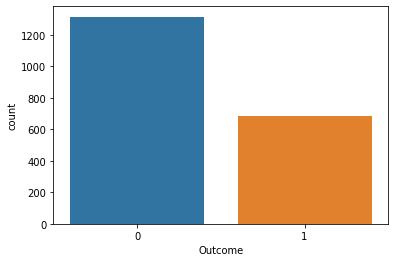

In [197]:
import seaborn as sns

sns.countplot(data = df_frankfurt_diabetes, x = 'Outcome')

In [5]:
# memisahkan atribut fitur (selain target/ kelas prediksi)
x = df_frankfurt_diabetes[df_frankfurt_diabetes.columns[:8]]
 
# memisahkan target/ kelas prediksi (0 dan 1)
y = df_frankfurt_diabetes['Outcome']

In [79]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138,62,35,0,33.6,0.127,47
1,0,84,82,31,125,38.2,0.233,23
2,0,145,0,0,0,44.2,0.630,31
3,0,135,68,42,250,42.3,0.365,24
4,1,139,62,41,480,40.7,0.536,21


In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(x)
x = pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7
0,0.117647,0.693467,0.508197,0.318182,0.000000,0.416873,0.020922,0.433333
1,0.000000,0.422111,0.672131,0.281818,0.168011,0.473945,0.066183,0.033333
2,0.000000,0.728643,0.000000,0.000000,0.000000,0.548387,0.235696,0.166667
3,0.000000,0.678392,0.557377,0.381818,0.336022,0.524814,0.122545,0.050000
4,0.058824,0.698492,0.508197,0.372727,0.645161,0.504963,0.195559,0.000000
...,...,...,...,...,...,...,...,...
1995,0.117647,0.376884,0.524590,0.218182,0.073925,0.368486,0.124680,0.200000
1996,0.470588,0.899497,0.590164,0.381818,0.174731,0.405707,0.273698,0.250000
1997,0.352941,0.427136,0.639344,0.000000,0.000000,0.387097,0.129804,0.350000
1998,0.000000,0.648241,0.901639,0.418182,0.174731,0.832506,0.102904,0.083333


In [7]:
y

0       1
1       0
2       1
3       1
4       0
       ..
1995    0
1996    1
1997    0
1998    1
1999    0
Name: Outcome, Length: 2000, dtype: int64

In [12]:
# memisahkan data untuk training dan testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

### Bagging

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier

In [202]:
clf = BaggingClassifier().fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('BAGGING RESULT =')
print('Accuracy : ', accuracy, '\nPrecision : ', precision, '\nRecall : ', recall, '\nF1-Score : ', f1)

BAGGING RESULT =
Accuracy :  0.9925 
Precision :  0.9945454545454546 
Recall :  0.98828125 
F1-Score :  0.9913289158977101


In [14]:
clf = RandomForestClassifier().fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('RANDOM FOREST RESULT =')
print('Accuracy : ', accuracy, '\nPrecision : ', precision, '\nRecall : ', recall, '\nF1-Score : ', f1)

RANDOM FOREST RESULT =
Accuracy :  0.99 
Precision :  0.9927536231884058 
Recall :  0.984375 
F1-Score :  0.9884138570269958


In [204]:
clf = ExtraTreesClassifier().fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('EXTRA TREES RESULT =')
print('Accuracy : ', accuracy, '\nPrecision : ', precision, '\nRecall : ', recall, '\nF1-Score : ', f1)

EXTRA TREES RESULT =
Accuracy :  0.9825 
Precision :  0.9874551971326164 
Recall :  0.97265625 
F1-Score :  0.979591687986064


### Boosting

In [205]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [206]:
clf = AdaBoostClassifier().fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('ADABOOST RESULT =')
print('Accuracy : ', accuracy, '\nPrecision : ', precision, '\nRecall : ', recall, '\nF1-Score : ', f1)

ADABOOST RESULT =
Accuracy :  0.7875 
Precision :  0.7580247294255495 
Recall :  0.7403492647058824 
F1-Score :  0.7476228297419073


In [207]:
clf = GradientBoostingClassifier().fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('GRADIENT BOOSTING RESULT =')
print('Accuracy : ', accuracy, '\nPrecision : ', precision, '\nRecall : ', recall, '\nF1-Score : ', f1)

GRADIENT BOOSTING RESULT =
Accuracy :  0.86 
Precision :  0.8555093555093556 
Recall :  0.8143382352941176 
F1-Score :  0.8300145701796988


In [208]:
clf = XGBClassifier().fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('EXTREME GRADIENT BOOSTING RESULT =')
print('Accuracy : ', accuracy, '\nPrecision : ', precision, '\nRecall : ', recall, '\nF1-Score : ', f1)

EXTREME GRADIENT BOOSTING RESULT =
Accuracy :  0.8625 
Precision :  0.8521306773901929 
Recall :  0.8244485294117647 
F1-Score :  0.8359176306505867


In [209]:
clf = LGBMClassifier().fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('LIGHT GRADIENT BOOSTING RESULT =')
print('Accuracy : ', accuracy, '\nPrecision : ', precision, '\nRecall : ', recall, '\nF1-Score : ', f1)

LIGHT GRADIENT BOOSTING RESULT =
Accuracy :  0.9925 
Precision :  0.9923999884629806 
Recall :  0.9903492647058824 
F1-Score :  0.9913653534808419


In [210]:
clf = CatBoostClassifier().fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('CAT BOOSTING RESULT =')
print('Accuracy : ', accuracy, '\nPrecision : ', precision, '\nRecall : ', recall, '\nF1-Score : ', f1)

Learning rate set to 0.012592
0:	learn: 0.6851008	total: 2.27ms	remaining: 2.26s
1:	learn: 0.6782084	total: 4.49ms	remaining: 2.24s
2:	learn: 0.6718263	total: 6.61ms	remaining: 2.2s
3:	learn: 0.6641266	total: 8.72ms	remaining: 2.17s
4:	learn: 0.6583397	total: 10.8ms	remaining: 2.15s
5:	learn: 0.6514912	total: 12.8ms	remaining: 2.13s
6:	learn: 0.6458257	total: 15.2ms	remaining: 2.16s
7:	learn: 0.6402489	total: 17.3ms	remaining: 2.15s
8:	learn: 0.6338445	total: 19.4ms	remaining: 2.13s
9:	learn: 0.6279568	total: 21.7ms	remaining: 2.15s
10:	learn: 0.6221310	total: 24ms	remaining: 2.16s
11:	learn: 0.6164209	total: 26.1ms	remaining: 2.15s
12:	learn: 0.6120646	total: 28.2ms	remaining: 2.14s
13:	learn: 0.6063269	total: 30.3ms	remaining: 2.14s
14:	learn: 0.6017284	total: 32.4ms	remaining: 2.13s
15:	learn: 0.5970678	total: 34.4ms	remaining: 2.12s
16:	learn: 0.5923360	total: 36.5ms	remaining: 2.11s
17:	learn: 0.5888135	total: 38.1ms	remaining: 2.08s
18:	learn: 0.5846298	total: 40.5ms	remaining: 2

### Stacking

In [211]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [212]:
estimators = list()
estimators.append(('lr', LogisticRegression()))
estimators.append(('svm', SVC()))
estimators.append(('bayes', GaussianNB()))
estimators.append(('knn', KNeighborsClassifier()))
estimators.append(('cart', DecisionTreeClassifier()))

In [213]:
clf = StackingClassifier(estimators = estimators).fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('STACKING RESULT =')
print('Accuracy : ', accuracy, '\nPrecision : ', precision, '\nRecall : ', recall, '\nF1-Score : ', f1)

STACKING RESULT =
Accuracy :  0.985 
Precision :  0.9809116809116809 
Recall :  0.9848345588235294 
F1-Score :  0.9828370376727023


## Dataset 3 : Sylhet Hospital Diabetes

In [4]:
df_sylhet_diabetes.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [7]:
df_sylhet_diabetes.groupby('class').count()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
class,,,,,,,,,,,,,,,,
Negative,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200
Positive,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320


In [33]:
df_sylhet_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [34]:
df_sylhet_diabetes.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


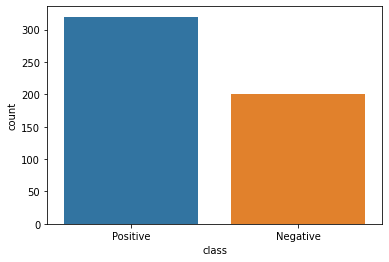

In [35]:
import seaborn as sns

sns.countplot(data = df_sylhet_diabetes, x = 'class')

In [37]:
# memisahkan atribut fitur (selain target/ kelas prediksi)
x = df_sylhet_diabetes[df_sylhet_diabetes.columns[:16]]
 
# memisahkan target/ kelas prediksi (0 dan 1)
y = df_sylhet_diabetes['class'].replace("Positive", 1)
y = y.replace("Negative", 0)

In [38]:
x.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [41]:
x = pd.get_dummies(x)
x

,Age,Gender_Female,Gender_Male,Polyuria_No,Polyuria_Yes,Polydipsia_No,Polydipsia_Yes,sudden weight loss_No,sudden weight loss_Yes,weakness_No,weakness_Yes,Polyphagia_No,Polyphagia_Yes,Genital thrush_No,Genital thrush_Yes,visual blurring_No,visual blurring_Yes,Itching_No,Itching_Yes,Irritability_No,Irritability_Yes,delayed healing_No,delayed healing_Yes,partial paresis_No,partial paresis_Yes,muscle stiffness_No,muscle stiffness_Yes,Alopecia_No,Alopecia_Yes,Obesity_No,Obesity_Yes
0,40,0,1,1,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1
1,58,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0
2,41,0,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,1,0
3,45,0,1,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0
4,60,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,1,0,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0
516,48,1,0,0,1,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,1,1,0,1,0,1,0
517,58,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0,1
518,32,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,1,0,0,1,1,0,1,0,0,1,1,0


In [40]:
y

0      1
1      1
2      1
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: class, Length: 520, dtype: int64

In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(x)
x = pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,0.324324,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.567568,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.337838,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.391892,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.594595,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,0.310811,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
516,0.432432,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
517,0.567568,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
518,0.216216,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [43]:
# memisahkan data untuk training dan testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

### Bagging

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier

In [45]:
clf = BaggingClassifier().fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('BAGGING RESULT =')
print('Accuracy : ', accuracy, '\nPrecision : ', precision, '\nRecall : ', recall, '\nF1-Score : ', f1)

BAGGING RESULT =
Accuracy :  0.9711538461538461 
Precision :  0.967673248161053 
Recall :  0.971875 
F1-Score :  0.9696704578594342


In [46]:
clf = RandomForestClassifier().fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('RANDOM FOREST RESULT =')
print('Accuracy : ', accuracy, '\nPrecision : ', precision, '\nRecall : ', recall, '\nF1-Score : ', f1)

RANDOM FOREST RESULT =
Accuracy :  0.9903846153846154 
Precision :  0.9878048780487805 
Recall :  0.9921875 
F1-Score :  0.9898901526198114


In [47]:
clf = ExtraTreesClassifier().fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('EXTRA TREES RESULT =')
print('Accuracy : ', accuracy, '\nPrecision : ', precision, '\nRecall : ', recall, '\nF1-Score : ', f1)

EXTRA TREES RESULT =
Accuracy :  1.0 
Precision :  1.0 
Recall :  1.0 
F1-Score :  1.0


### Boosting

In [51]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [52]:
clf = AdaBoostClassifier().fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('ADABOOST RESULT =')
print('Accuracy : ', accuracy, '\nPrecision : ', precision, '\nRecall : ', recall, '\nF1-Score : ', f1)

ADABOOST RESULT =
Accuracy :  0.9423076923076923 
Precision :  0.9493464052287581 
Recall :  0.9296875 
F1-Score :  0.937799043062201


In [53]:
clf = GradientBoostingClassifier().fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('GRADIENT BOOSTING RESULT =')
print('Accuracy : ', accuracy, '\nPrecision : ', precision, '\nRecall : ', recall, '\nF1-Score : ', f1)

GRADIENT BOOSTING RESULT =
Accuracy :  0.9903846153846154 
Precision :  0.9878048780487805 
Recall :  0.9921875 
F1-Score :  0.9898901526198114


In [54]:
clf = XGBClassifier().fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('EXTREME GRADIENT BOOSTING RESULT =')
print('Accuracy : ', accuracy, '\nPrecision : ', precision, '\nRecall : ', recall, '\nF1-Score : ', f1)

EXTREME GRADIENT BOOSTING RESULT =
Accuracy :  0.9903846153846154 
Precision :  0.9878048780487805 
Recall :  0.9921875 
F1-Score :  0.9898901526198114


In [55]:
clf = LGBMClassifier().fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('LIGHT GRADIENT BOOSTING RESULT =')
print('Accuracy : ', accuracy, '\nPrecision : ', precision, '\nRecall : ', recall, '\nF1-Score : ', f1)

LIGHT GRADIENT BOOSTING RESULT =
Accuracy :  1.0 
Precision :  1.0 
Recall :  1.0 
F1-Score :  1.0


In [56]:
clf = CatBoostClassifier().fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('CAT BOOSTING RESULT =')
print('Accuracy : ', accuracy, '\nPrecision : ', precision, '\nRecall : ', recall, '\nF1-Score : ', f1)

Learning rate set to 0.007084
0:	learn: 0.6833842	total: 50.9ms	remaining: 50.8s
1:	learn: 0.6762231	total: 53ms	remaining: 26.4s
2:	learn: 0.6678531	total: 55ms	remaining: 18.3s
3:	learn: 0.6594503	total: 57.1ms	remaining: 14.2s
4:	learn: 0.6497915	total: 59.1ms	remaining: 11.8s
5:	learn: 0.6424604	total: 61.1ms	remaining: 10.1s
6:	learn: 0.6348130	total: 63.1ms	remaining: 8.96s
7:	learn: 0.6264315	total: 64.4ms	remaining: 7.99s
8:	learn: 0.6183877	total: 66.4ms	remaining: 7.31s
9:	learn: 0.6117542	total: 67.6ms	remaining: 6.69s
10:	learn: 0.6037743	total: 69.6ms	remaining: 6.26s
11:	learn: 0.5966129	total: 71.5ms	remaining: 5.89s
12:	learn: 0.5894557	total: 73.4ms	remaining: 5.58s
13:	learn: 0.5811305	total: 75.4ms	remaining: 5.31s
14:	learn: 0.5745143	total: 77.2ms	remaining: 5.07s
15:	learn: 0.5670673	total: 79.1ms	remaining: 4.87s
16:	learn: 0.5593025	total: 81.1ms	remaining: 4.69s
17:	learn: 0.5529772	total: 82.3ms	remaining: 4.49s
18:	learn: 0.5456344	total: 84.4ms	remaining: 4.

### Stacking

In [57]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [58]:
estimators = list()
estimators.append(('lr', LogisticRegression()))
estimators.append(('svm', SVC()))
estimators.append(('bayes', GaussianNB()))
estimators.append(('knn', KNeighborsClassifier()))
estimators.append(('cart', DecisionTreeClassifier()))

In [59]:
clf = StackingClassifier(estimators = estimators).fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('STACKING RESULT =')
print('Accuracy : ', accuracy, '\nPrecision : ', precision, '\nRecall : ', recall, '\nF1-Score : ', f1)

STACKING RESULT =
Accuracy :  0.9903846153846154 
Precision :  0.9878048780487805 
Recall :  0.9921875 
F1-Score :  0.9898901526198114


## Dataset 4 : Bit Mesra Diabetes Dataset 2019

In [12]:
df_bit_mesra_diabetes.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no


In [13]:
df_bit_mesra_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               952 non-null    object 
 1   Gender            952 non-null    object 
 2   Family_Diabetes   952 non-null    object 
 3   highBP            952 non-null    object 
 4   PhysicallyActive  952 non-null    object 
 5   BMI               948 non-null    float64
 6   Smoking           952 non-null    object 
 7   Alcohol           952 non-null    object 
 8   Sleep             952 non-null    int64  
 9   SoundSleep        952 non-null    int64  
 10  RegularMedicine   952 non-null    object 
 11  JunkFood          952 non-null    object 
 12  Stress            952 non-null    object 
 13  BPLevel           952 non-null    object 
 14  Pregancies        910 non-null    float64
 15  Pdiabetes         951 non-null    object 
 16  UriationFreq      952 non-null    object 
 1

In [14]:
# for i in df_bit_mesra_diabetes['BMI'] :
#   print(i)
# df_bit_mesra_diabetes[['BMI']] = df_bit_mesra_diabetes[['BMI']].replace(0, nan)
# num_missing = (df_bit_mesra_diabetes[['BMI']].isnull()).sum()
# num_missing
# df_bit_mesra_diabetes.isnull().sum()
df_bit_mesra_diabetes.dropna(inplace=True)
df_bit_mesra_diabetes.isnull().sum()

Age                 0
Gender              0
Family_Diabetes     0
highBP              0
PhysicallyActive    0
BMI                 0
Smoking             0
Alcohol             0
Sleep               0
SoundSleep          0
RegularMedicine     0
JunkFood            0
Stress              0
BPLevel             0
Pregancies          0
Pdiabetes           0
UriationFreq        0
Diabetic            0
dtype: int64

In [7]:
df_bit_mesra_diabetes = pd.get_dummies(df_bit_mesra_diabetes)

In [27]:
x = df_bit_mesra_diabetes[df_bit_mesra_diabetes.columns[:17]]
x = pd.get_dummies(x)
x

,BMI,Sleep,SoundSleep,Pregancies,Age_40-49,Age_50-59,Age_60 or older,Age_less than 40,Gender_Female,Gender_Male,Family_Diabetes_no,Family_Diabetes_yes,highBP_no,highBP_yes,PhysicallyActive_less than half an hr,PhysicallyActive_more than half an hr,PhysicallyActive_none,PhysicallyActive_one hr or more,Smoking_no,Smoking_yes,Alcohol_no,Alcohol_yes,RegularMedicine_no,RegularMedicine_o,RegularMedicine_yes,JunkFood_always,JunkFood_occasionally,JunkFood_often,JunkFood_very often,Stress_always,Stress_not at all,Stress_sometimes,Stress_very often,BPLevel_High,BPLevel_Low,BPLevel_high,BPLevel_low,BPLevel_normal,BPLevel_normal,Pdiabetes_0,Pdiabetes_yes,UriationFreq_not much,UriationFreq_quite often
0,39.0,8,6,0.0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0
1,28.0,8,6,0.0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0
2,24.0,6,6,0.0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0
3,23.0,8,6,0.0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0
4,27.0,8,8,0.0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,25.0,8,6,0.0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0
948,27.0,6,5,0.0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1
949,23.0,6,5,0.0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0
950,27.0,6,5,0.0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0


In [18]:
y = df_bit_mesra_diabetes['Diabetic'].replace('no', 0)
y = y.replace('yes', 1)
y

0      0
1      0
2      0
3      0
4      0
      ..
947    1
948    1
949    0
950    0
951    1
Name: Diabetic, Length: 905, dtype: object

In [30]:
# memisahkan data untuk training dan testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

### Bagging

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier

In [ ]:
clf = BaggingClassifier().fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('BAGGING RESULT =')
print('Accuracy : ', accuracy, '\nPrecision : ', precision, '\nRecall : ', recall, '\nF1-Score : ', f1)

BAGGING RESULT =
Accuracy :  0.97 
Precision :  0.9788732394366197 
Recall :  0.953125 
F1-Score :  0.9646184691590989


In [ ]:
clf = RandomForestClassifier().fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('RANDOM FOREST RESULT =')
print('Accuracy : ', accuracy, '\nPrecision : ', precision, '\nRecall : ', recall, '\nF1-Score : ', f1)

RANDOM FOREST RESULT =
Accuracy :  0.995 
Precision :  0.9963503649635037 
Recall :  0.9921875 
F1-Score :  0.9942314902944824


In [ ]:
clf = ExtraTreesClassifier().fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('EXTRA TREES RESULT =')
print('Accuracy : ', accuracy, '\nPrecision : ', precision, '\nRecall : ', recall, '\nF1-Score : ', f1)

EXTRA TREES RESULT =
Accuracy :  0.995 
Precision :  0.9963503649635037 
Recall :  0.9921875 
F1-Score :  0.9942314902944824


### Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [ ]:
clf = AdaBoostClassifier().fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('ADABOOST RESULT =')
print('Accuracy : ', accuracy, '\nPrecision : ', precision, '\nRecall : ', recall, '\nF1-Score : ', f1)

ADABOOST RESULT =
Accuracy :  0.7875 
Precision :  0.7580247294255495 
Recall :  0.7403492647058824 
F1-Score :  0.7476228297419073


In [ ]:
clf = GradientBoostingClassifier().fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('GRADIENT BOOSTING RESULT =')
print('Accuracy : ', accuracy, '\nPrecision : ', precision, '\nRecall : ', recall, '\nF1-Score : ', f1)

GRADIENT BOOSTING RESULT =
Accuracy :  0.86 
Precision :  0.8555093555093556 
Recall :  0.8143382352941176 
F1-Score :  0.8300145701796988


In [ ]:
clf = XGBClassifier().fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('EXTREME GRADIENT BOOSTING RESULT =')
print('Accuracy : ', accuracy, '\nPrecision : ', precision, '\nRecall : ', recall, '\nF1-Score : ', f1)

EXTREME GRADIENT BOOSTING RESULT =
Accuracy :  0.8625 
Precision :  0.8521306773901929 
Recall :  0.8244485294117647 
F1-Score :  0.8359176306505867


In [ ]:
clf = LGBMClassifier().fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('LIGHT GRADIENT BOOSTING RESULT =')
print('Accuracy : ', accuracy, '\nPrecision : ', precision, '\nRecall : ', recall, '\nF1-Score : ', f1)

LIGHT GRADIENT BOOSTING RESULT =
Accuracy :  0.9925 
Precision :  0.9923999884629806 
Recall :  0.9903492647058824 
F1-Score :  0.9913653534808419


In [ ]:
clf = CatBoostClassifier().fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('EXTREME GRADIENT BOOSTING RESULT =')
print('Accuracy : ', accuracy, '\nPrecision : ', precision, '\nRecall : ', recall, '\nF1-Score : ', f1)

Learning rate set to 0.012592
0:	learn: 0.6851008	total: 2.18ms	remaining: 2.18s
1:	learn: 0.6782084	total: 4.09ms	remaining: 2.04s
2:	learn: 0.6718263	total: 5.96ms	remaining: 1.98s
3:	learn: 0.6641266	total: 7.78ms	remaining: 1.94s
4:	learn: 0.6583397	total: 9.6ms	remaining: 1.91s
5:	learn: 0.6514912	total: 11.4ms	remaining: 1.89s
6:	learn: 0.6458257	total: 13.3ms	remaining: 1.88s
7:	learn: 0.6402489	total: 15.1ms	remaining: 1.87s
8:	learn: 0.6338445	total: 17ms	remaining: 1.87s
9:	learn: 0.6279568	total: 19.2ms	remaining: 1.9s
10:	learn: 0.6221310	total: 21.1ms	remaining: 1.9s
11:	learn: 0.6164209	total: 23ms	remaining: 1.89s
12:	learn: 0.6120646	total: 24.8ms	remaining: 1.88s
13:	learn: 0.6063269	total: 26.7ms	remaining: 1.88s
14:	learn: 0.6017284	total: 28.5ms	remaining: 1.87s
15:	learn: 0.5970678	total: 30.4ms	remaining: 1.87s
16:	learn: 0.5923360	total: 32.3ms	remaining: 1.86s
17:	learn: 0.5888135	total: 33.7ms	remaining: 1.84s
18:	learn: 0.5846298	total: 35.5ms	remaining: 1.83s

### Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
estimators = list()
estimators.append(('lr', LogisticRegression()))
estimators.append(('svm', SVC()))
estimators.append(('bayes', GaussianNB()))
estimators.append(('knn', KNeighborsClassifier()))
estimators.append(('cart', DecisionTreeClassifier()))

In [ ]:
clf = StackingClassifier(estimators = estimators).fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('EXTREME GRADIENT BOOSTING RESULT =')
print('Accuracy : ', accuracy, '\nPrecision : ', precision, '\nRecall : ', recall, '\nF1-Score : ', f1)

EXTREME GRADIENT BOOSTING RESULT =
Accuracy :  0.985 
Precision :  0.9809116809116809 
Recall :  0.9848345588235294 
F1-Score :  0.9828370376727023


In [16]:
# untuk menghapus warning
import warnings
warnings.filterwarnings('ignore')

def acc_summary(model, x_train, x_test, y_train, y_test):
    t0 = time()
    model.fit(x_train, y_train)
    pred_y = model.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, pred_y)*100
    print("accuracy : {0:.2f}%".format(accuracy))
    print("train and test time: {0:.2f}s".format(train_test_time))
    print("-"*50)
    return accuracy, train_test_time

# fungsi komparator
def classifier_comparator(x_train, x_test, y_train, y_test, classifier = zipped_clf):
    result = []
    for names, classifier in classifier:
        checker_pipeline = Pipeline([
            ('classifier', classifier)
        ])
        print("Validation result for {}".format(names))
        clf_acc, tt_time = acc_summary(checker_pipeline, x_train, x_test, y_train, y_test)
        result.append((classifier, names, clf_acc, tt_time))
    return result

In [17]:
result = classifier_comparator(x_train, y_train, x_test, y_test)

Validation result for Random Forest Classifier


ValueError: ignored

In [45]:
from sklearn.svm import SVC

svm_classifier = SVC()
svm_classifier.fit(PCA_features, y_train)
x_test_PCA = PCA_fitter.fit_transform(x_test)
svm_classifier.score(x_test_PCA, y_test)

0.7857142857142857

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score

def getScores(estimator, x, y):
    yPred = estimator.predict(x)
    return (accuracy_score(y, yPred), 
            precision_score(y, yPred), 
            recall_score(y, yPred),
            f1_score(y, yPred))

def my_scorer(estimator, x, y):
    a, p, r, f = getScores(estimator, x, y)
    print ('a = ', a, 'p = ', p, 'r = ', r, 'f = ', f)
    return a+p+r+f

scores = cross_val_score(svm_classifier, x, y, cv=10, scoring = my_scorer)
scores
# print('max score = ', scores.max())
# print('avg score = ', scores.mean())

a =  0.7402597402597403 p =  0.6842105263157895 r =  0.48148148148148145 f =  0.5652173913043478
a =  0.7402597402597403 p =  0.8181818181818182 r =  0.3333333333333333 f =  0.4736842105263157
a =  0.7402597402597403 p =  0.6666666666666666 r =  0.5185185185185185 f =  0.5833333333333334
a =  0.7142857142857143 p =  0.6190476190476191 r =  0.48148148148148145 f =  0.5416666666666666
a =  0.7272727272727273 p =  0.8 r =  0.2962962962962963 f =  0.43243243243243246
a =  0.8051948051948052 p =  0.875 r =  0.5185185185185185 f =  0.6511627906976744
a =  0.7532467532467533 p =  0.7222222222222222 r =  0.48148148148148145 f =  0.5777777777777777
a =  0.8051948051948052 p =  0.8 r =  0.5925925925925926 f =  0.6808510638297872
a =  0.7631578947368421 p =  0.7222222222222222 r =  0.5 f =  0.5909090909090908
a =  0.7894736842105263 p =  0.8125 r =  0.5 f =  0.6190476190476191


array([2.47116914, 2.3654591 , 2.50877826, 2.35648148, 2.25600146,
       2.84987611, 2.53472823, 2.87863846, 2.57628921, 2.7210213 ])

In [ ]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

AdaBoostClassifier()

In [16]:
from time import time
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from keras.callbacks import ModelCheckpoint

In [17]:
parameters = {'bootstrap': True,
              'min_samples_leaf': 3,
              'n_estimators': 50, 
              'min_samples_split': 10,
              'max_features': 'sqrt',
              'max_depth': 6,
              'max_leaf_nodes': None}

## **Using Random Forest**

In [18]:
RF_model = RandomForestClassifier(**parameters)

In [19]:
RF_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
RF_predictions = RF_model.predict(x_test)

In [21]:
score = accuracy_score(y_test ,RF_predictions)
print('Accuracy Random Forest Model:',score)

Accuracy Random Forest Model: 0.8181818181818182


## **Using Neural Network**

In [22]:
# Build a neural network :
NN_model = Sequential()

NN_model.add(Dense(256, input_dim = x.shape[1], activation='relu'))
NN_model.add(Dense(256, activation='relu'))
NN_model.add(Dense(256, activation='relu'))
NN_model.add(Dense(256, activation='relu'))
NN_model.add(Dense(1, activation='sigmoid'))
NN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
checkpoint_name = 'BestWeights.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_accuracy', verbose = 1, save_best_only = True, mode ='max')
callbacks_list = [checkpoint]

In [24]:
t0_nn = time()
NN_model.fit(x_train, y_train, epochs=150, batch_size=64, validation_split = 0.2, callbacks=callbacks_list)
train_test_time = time() - t0_nn

Epoch 1/150
8/8 [==============================] - 13s 79ms/step - loss: 3.6690 - accuracy: 0.5004 - val_loss: 1.1157 - val_accuracy: 0.6667

Epoch 00001: val_accuracy improved from -inf to 0.66667, saving model to BestWeights.hdf5
Epoch 2/150
8/8 [==============================] - 0s 9ms/step - loss: 1.2099 - accuracy: 0.6168 - val_loss: 0.6753 - val_accuracy: 0.5691

Epoch 00002: val_accuracy did not improve from 0.66667
Epoch 3/150
8/8 [==============================] - 0s 9ms/step - loss: 0.6809 - accuracy: 0.6094 - val_loss: 0.6276 - val_accuracy: 0.6341

Epoch 00003: val_accuracy did not improve from 0.66667
Epoch 4/150
8/8 [==============================] - 0s 7ms/step - loss: 0.6014 - accuracy: 0.6475 - val_loss: 0.6472 - val_accuracy: 0.6504

Epoch 00004: val_accuracy did not improve from 0.66667
Epoch 5/150
8/8 [==============================] - 0s 8ms/step - loss: 0.5812 - accuracy: 0.6682 - val_loss: 0.6395 - val_accuracy: 0.6748

Epoch 00005: val_accuracy improved from 0.6

In [25]:
# Load wights file of the best model :
wights_file = './BestWeights.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load weights
NN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
predictions = NN_model.predict(x_test)

In [27]:
# round predictions
rounded = [round(x[0]) for x in predictions]
predictions = rounded

In [28]:
score = accuracy_score(y_test ,predictions)
print('Test Accuracy:',score)

Test Accuracy: 0.6428571428571429


## **Other Classifier**

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [30]:
names = [ 'Neural Network',
          'Logistic Regression',
          'SVC',
          'Gradient Boosting Classifier',
          'Extra Trees Classifier',
          'Bagging Classifier',
          'AdaBoost Classifier',
          'Gaussian NB',
          'MLP Classifier',
          'XGB Classifier',
          'LGBM Classisfier',
          "K Nearest Neighbour Classifier",
          "Decison Tree Classifier",
          "Random Forest Classifier",
         ]
classifiers = [
    NN_model,           
    LogisticRegression(),
    SVC(),
    GradientBoostingClassifier(),
    ExtraTreesClassifier(),
    BaggingClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    MLPClassifier(),
    XGBClassifier(),
    LGBMClassifier(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
        ]

# Zipped all architecture
zipped_clf = zip(names,classifiers)

In [31]:
import warnings
# untuk menghapus warning
warnings.filterwarnings('ignore')

# fungsi accuracy testing 
def acc_summary(model, train_X, train_y, val_X, val_y):
    t0 = time()
    model.fit(train_X, train_y)
    pred_y = model.predict(val_X)
    train_test_time = time() - t0
    accuracy = accuracy_score(val_y, pred_y)*100
    print("accuracy : {0:.2f}%".format(accuracy))
    print("train and test time: {0:.2f}s".format(train_test_time))
    print("-"*80)
    return accuracy, train_test_time

# fungsi komparator
def classifier_comparator(train_X,train_y,val_X,val_y,classifier=zipped_clf):
    result = []
    for n,c in classifier:
      if n=='Neural Network': # for only neural network
        predictions = NN_model.predict(x_test)
        # round predictions
        rounded = [round(x[0]) for x in predictions]
        predictions = rounded
        score = accuracy_score(val_y, predictions)*100
        print("Test result for {}".format(n))
        print("train and test time: {0:.2f}s".format(train_test_time))
        print("accuracy : {0:.2f}%".format(score))
        print("-"*80)
        result.append((c,n,score,train_test_time))
      else:
        checker_pipeline = Pipeline([
            ('classifier', c)
        ])
        print("Validation result for {}".format(n))
        #print(c)
        clf_acc,tt_time = acc_summary(checker_pipeline,train_X, train_y, val_X, val_y)
        result.append((c,n,clf_acc,tt_time))
    return result

In [32]:
result = classifier_comparator(x_train, y_train, x_test, y_test)

Test result for Neural Network
train and test time: 33.53s
accuracy : 64.29%
--------------------------------------------------------------------------------
Validation result for Logistic Regression
accuracy : 82.47%
train and test time: 0.03s
--------------------------------------------------------------------------------
Validation result for SVC
accuracy : 79.22%
train and test time: 0.02s
--------------------------------------------------------------------------------
Validation result for Gradient Boosting Classifier
accuracy : 81.82%
train and test time: 0.14s
--------------------------------------------------------------------------------
Validation result for Extra Trees Classifier
accuracy : 80.52%
train and test time: 0.15s
--------------------------------------------------------------------------------
Validation result for Bagging Classifier
accuracy : 77.27%
train and test time: 0.03s
--------------------------------------------------------------------------------
Validat

## **Plotting**

In [33]:
# Plotting models
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# get name and score models
n = [v[1] for v in result]
s = [v[2] for v in result]

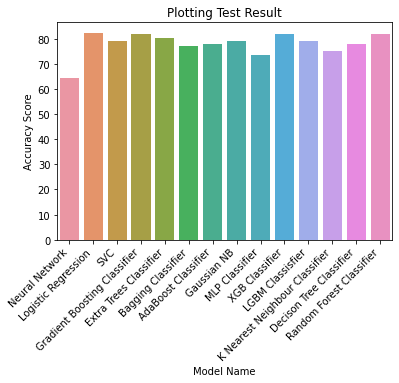

In [35]:
# Visualisasi model
plt.figure()
sns.barplot(x = n, y = s)

plt.title("Plotting Test Result")
plt.xlabel('Model Name')

plt.xticks(rotation=45, ha='right', size=10)
plt.yticks(size=10)
plt.ylabel('Accuracy Score')

plt.show()

## **Feature Importance**

In [36]:
# get best models [-1] is random forest and next [0] is index to model to get feature importance, and zipped with X column  
importances = sorted([(a,b) for a,b in zip(result[-1][0].feature_importances_, x.columns)],reverse=True)
n = [ni for si,ni in importances]
s = [si for si,ni in importances]

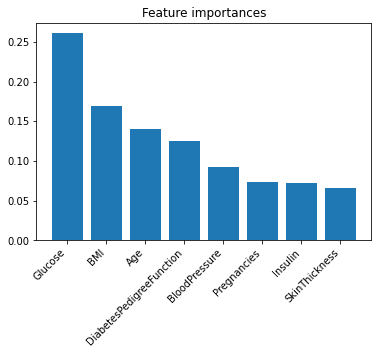

In [37]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(n,s)
plt.xticks(rotation=45, ha='right', size=10)
plt.yticks(size=10)
plt.show()

## **Ensemble Learning**

In [49]:
# Install and Import Dependencies
!pip install vecstack
from vecstack import stacking 

  Created wheel for vecstack: filename=vecstack-0.4.0-cp37-none-any.whl size=19877 sha256=8bad3078e9aa8bd9db8b832f4ff0506827843ddfe0f651ae99b2ff3802af0cdc
  Stored in directory: /root/.cache/pip/wheels/5f/bb/4e/f6488433d53bc0684673d6845e5bf11a25240577c8151c140e
Successfully built vecstack


In [ ]:
# get all models, 1-st level.
models = [v[0] for v in result[1:]] # tanpa neural network
print('Number of model:',len(models))

t0 = time()

# Compute stacking features
S_train, S_test = stacking(models, x_train, y_train, x_test, n_folds = 3, metric=accuracy_score, shuffle = True, random_state = 7, verbose = 1)

# Initialize 2-nd level model
model = models[-1]

# Fit 2-nd level model
model = model.fit(S_train, y_train)

# Predict
y_test_pred = model.predict(S_test)

train_test_time = time() - t0

Number of model: 13
task:         [regression]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [13]

model  0:     [LogisticRegression]
    ----
    MEAN:     [0.76041667] + [0.01473139]
    FULL:     [0.76041667]

model  1:     [SVC]
    ----
    MEAN:     [0.72222222] + [0.02009694]
    FULL:     [0.72222222]

model  2:     [GradientBoostingClassifier]
    ----
    MEAN:     [0.74479167] + [0.01533292]
    FULL:     [0.74479167]

model  3:     [ExtraTreesClassifier]
    ----
    MEAN:     [0.73958333] + [0.02250257]
    FULL:     [0.73958333]

model  4:     [BaggingClassifier]
    ----
    MEAN:     [0.75000000] + [0.01533292]
    FULL:     [0.75000000]

model  5:     [AdaBoostClassifier]
    ----
    MEAN:     [0.72743056] + [0.02734031]
    FULL:     [0.72743056]

model  6:     [GaussianNB]
    ----
    MEAN:     [0.75520833] + [0.02655739]
    FULL:     [0.75520833]

model  7:     [MLPClassifier]
    ----
    MEAN:     [0.68402778] + [0.01718662]
    FULL

In [ ]:
## Print vecstack result 
accuracy = accuracy_score(y_test, y_test_pred)*100
print("Stacking accuracy : {0:.2f}%".format(accuracy))
print("train and test time: {0:.2f}s".format(train_test_time))

Stacking accuracy : 77.08%
train and test time: 3.66s


# Dengan Preprocessing MinMaxScaler

# Dengan Preprocessing StandardScaler